# Task 2: Community structure on graphs

In [1]:
import community
import networkx as nx
import plotly as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display_html
def display_df_sbs(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Given script (Louvain algorithm)

In [3]:
# load the edge list and create a directed Graph
fh = open("canvas/hamster.edgelist", 'rb')
G = nx.read_edgelist(fh)
fh.close()

In [4]:
# This method implements Louvain method using a greedy algorithm
# This is the partition of highest modularity, 
# i.e. the highest partition of the dendrogram generated by the Louvain algorithm
# more details: http://perso.crans.org/aynaud/communities/api.html#community.best_partition
partition = community.community_louvain.best_partition(G)

In [5]:
# partition is the returned results of best_partition
# it is a dict in Python
print(partition)

{'1': 0, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 2, '8': 3, '9': 3, '10': 3, '11': 3, '12': 3, '13': 3, '14': 3, '15': 3, '16': 3, '17': 3, '18': 3, '19': 3, '20': 4, '21': 0, '22': 0, '23': 0, '24': 0, '25': 5, '26': 3, '27': 5, '28': 6, '29': 5, '30': 5, '31': 5, '32': 5, '33': 6, '34': 6, '35': 6, '36': 6, '37': 5, '38': 5, '39': 3, '40': 3, '41': 3, '42': 3, '43': 3, '44': 3, '45': 3, '46': 5, '47': 0, '48': 5, '49': 5, '50': 5, '51': 5, '52': 5, '53': 5, '54': 5, '55': 5, '56': 5, '57': 5, '58': 5, '59': 5, '60': 5, '61': 5, '62': 5, '63': 5, '64': 3, '65': 5, '66': 5, '67': 0, '68': 0, '69': 0, '70': 2, '71': 7, '72': 7, '73': 3, '74': 3, '75': 2, '76': 2, '77': 0, '78': 7, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 3, '86': 5, '87': 5, '88': 5, '89': 5, '90': 5, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 8, '108': 0, '109': 0, '110': 0, '111': 

Visualization from: https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx

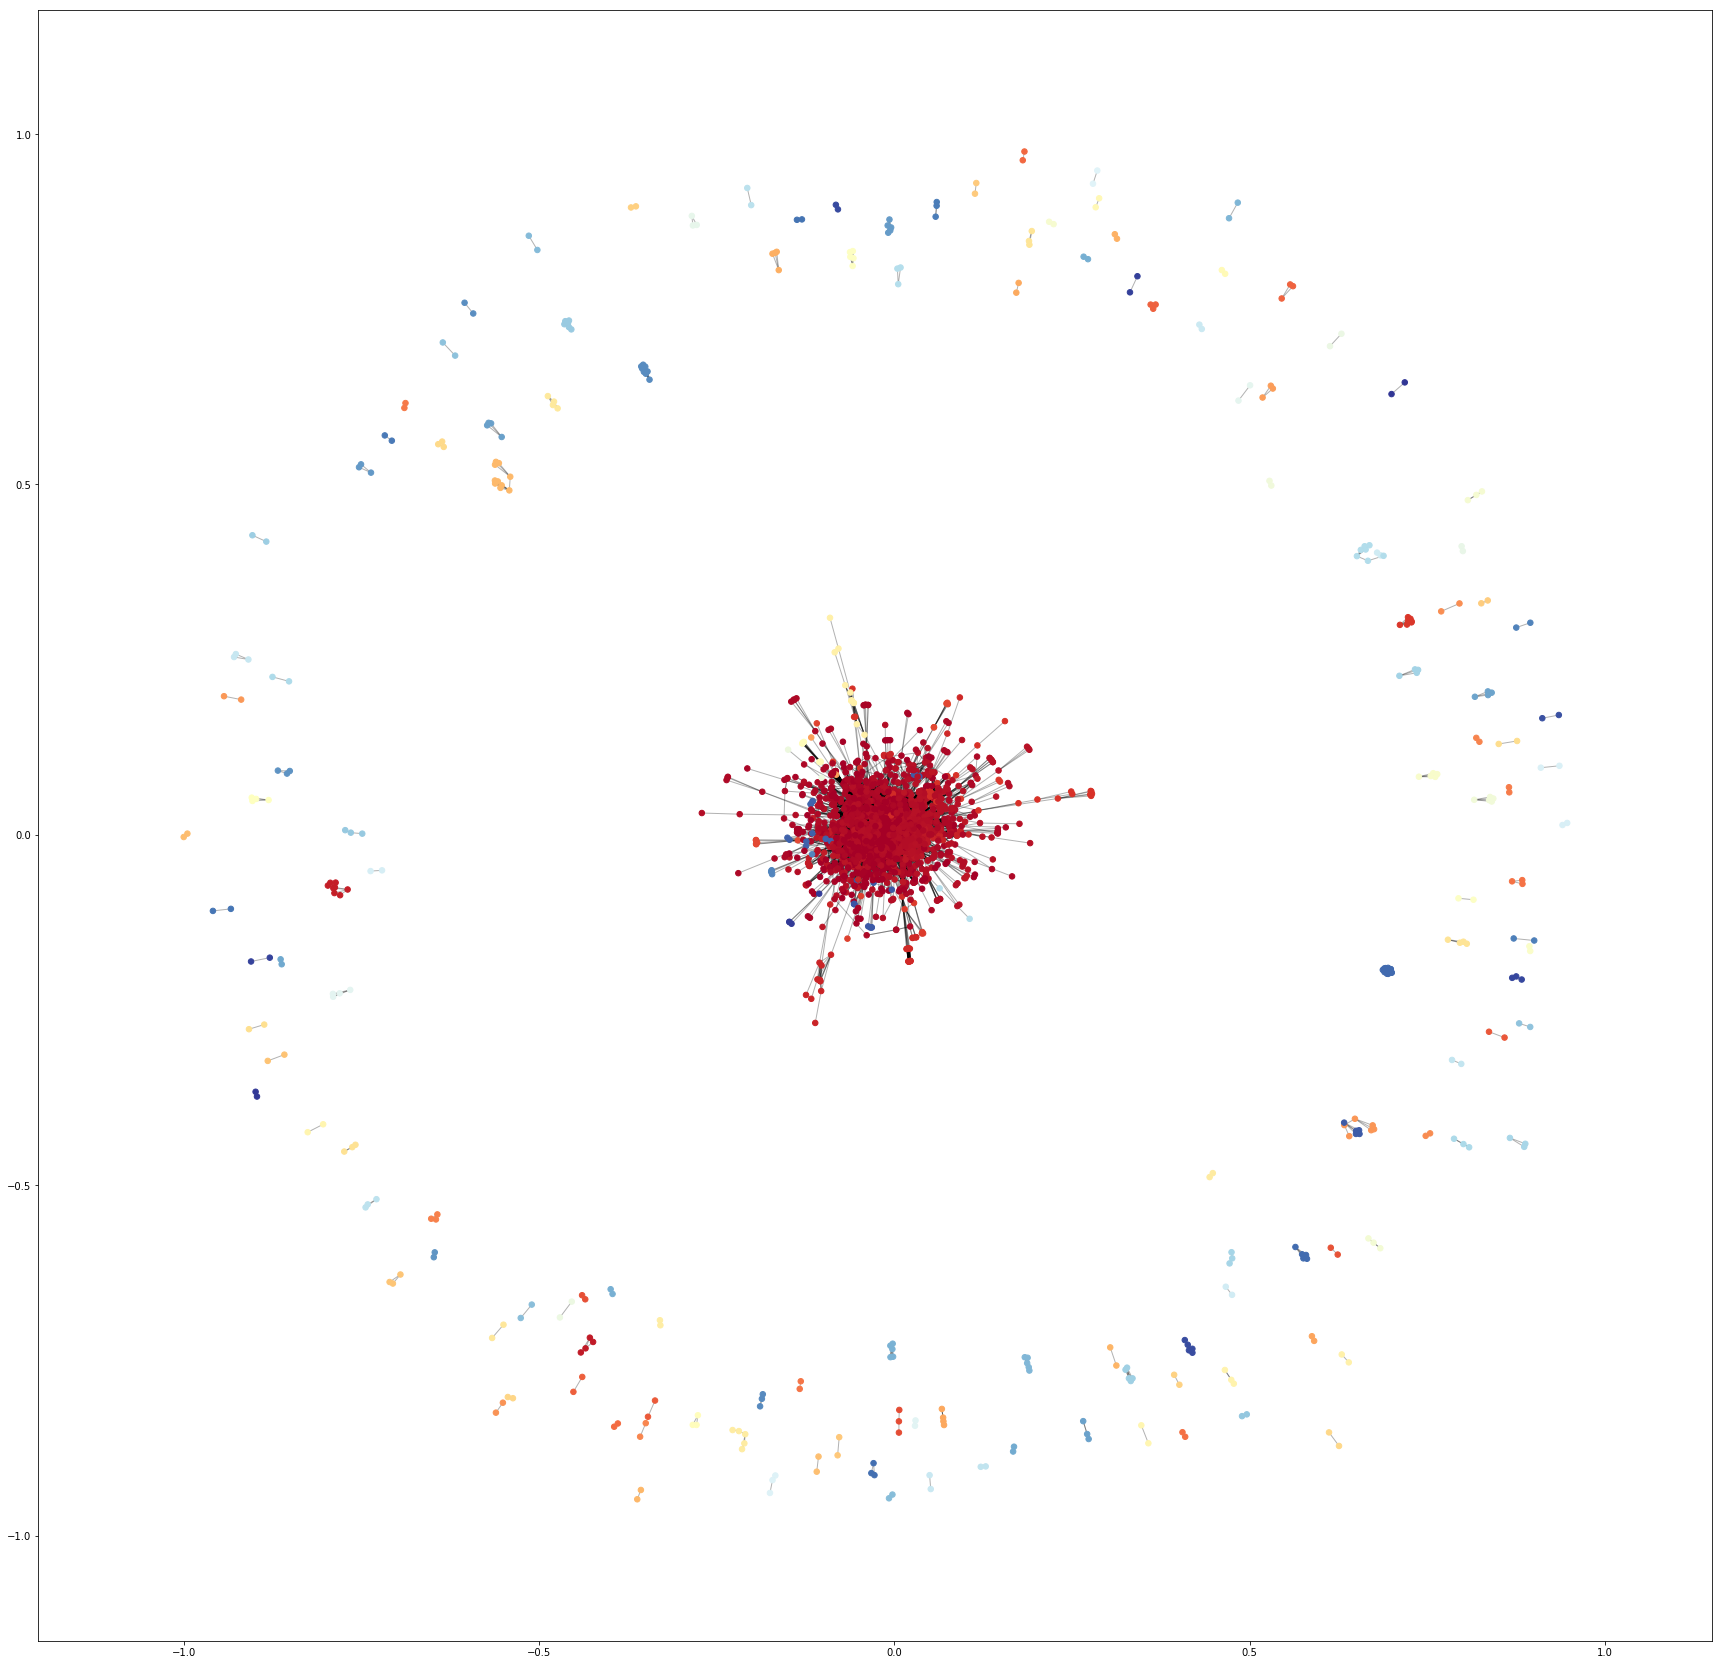

In [6]:
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(30, 30))
#plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [7]:
# Calculate number of communities.
len(set(partition.values()))

183

In [8]:
# Calculate the amount of members that each community has.
lst = []
for i in list(set(partition.values())):
    lst.append(sum(1 for x in partition.values() if x==i))
df_communities = pd.DataFrame({'community': range(0,183), 'members': lst})
display_df_sbs(df_communities.head(37), df_communities.iloc[37:74], df_communities.iloc[74:111], 
               df_communities.iloc[111:148], df_communities.tail(35))

,community,members
0,0,511
1,1,38
2,2,160
3,3,329
4,4,83
5,5,252
6,6,166
7,7,194
8,8,46
9,9,35


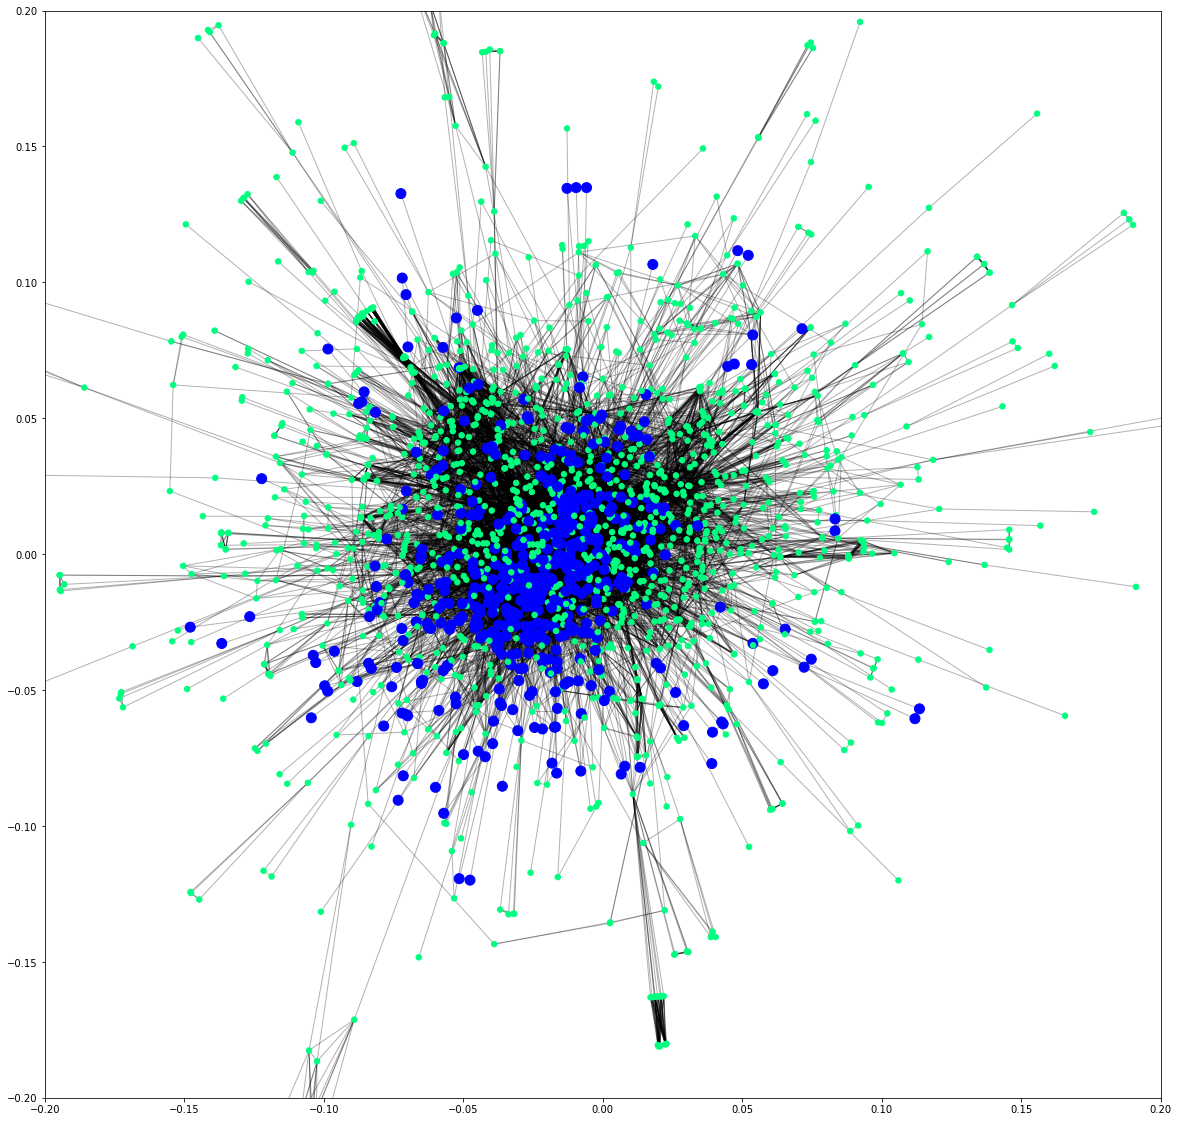

In [9]:
# Highlight one community (in this case, community 0) to make it easier to see
part = partition.copy()
node_size = []
for node, community in part.items():
    if community == 0:
        node_size.append(100)
    else:
        part[node] = 1  # I put all the other communities in one communitiy
        node_size.append(30)
        
plt.figure(figsize=(20, 20))
# plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.winter, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)

# x and y zoom, for far zoom run notebook as: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.show(G)

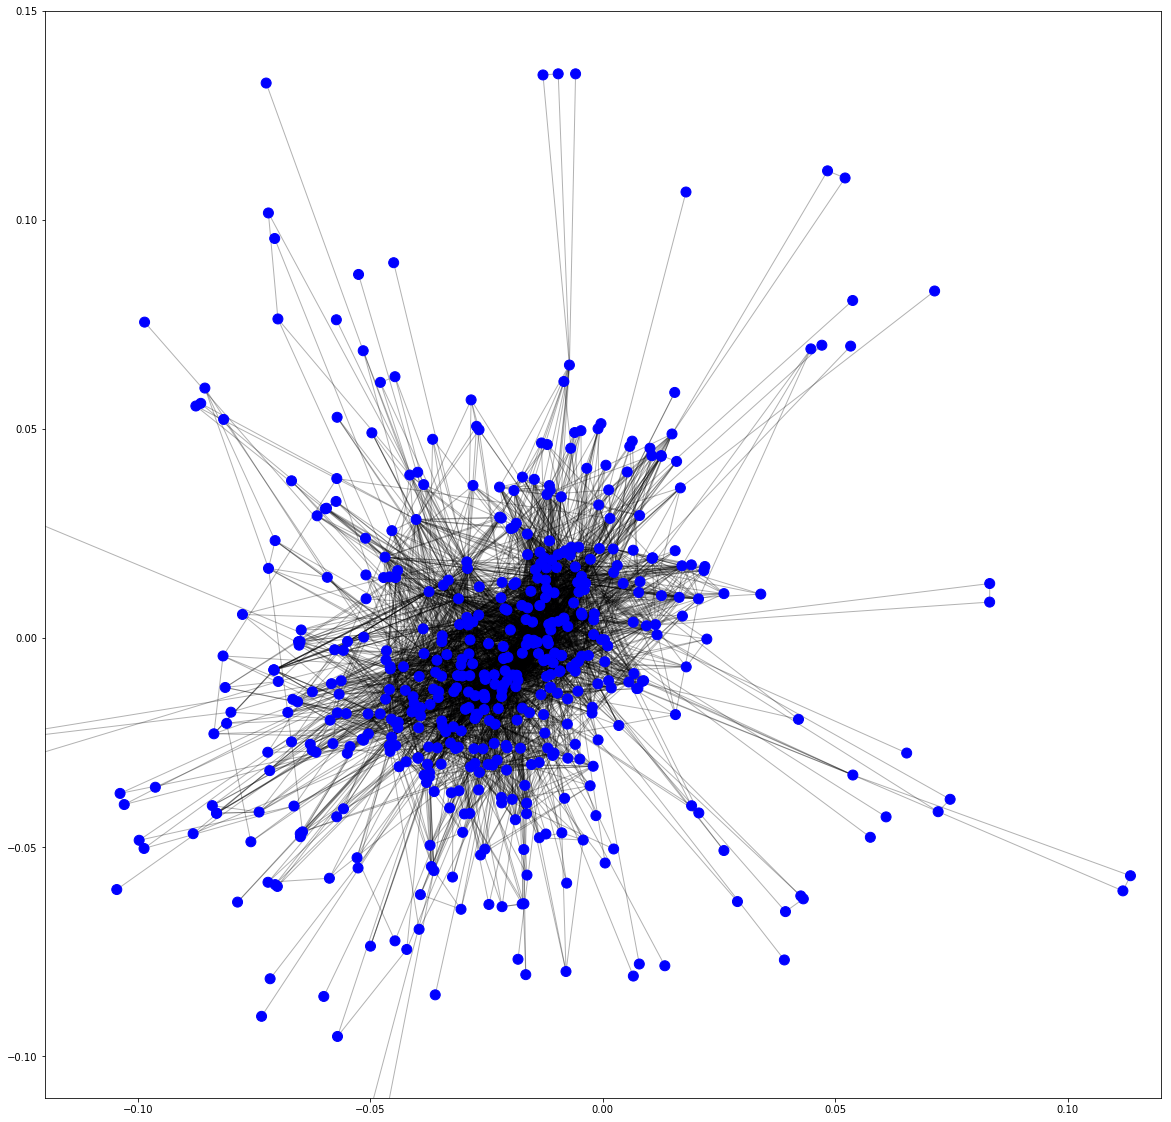

In [10]:
# Show only one community (in this case, community 0)
part = partition.copy()
H = G.copy()
node_size = []
for node, community in part.items():
    if community == 0:
        node_size.append(100)
    else:
        for node2, community2 in partition.items():
            if (node != node2):
                if (H.has_edge(node, node2)):
                    H.remove_edge(node, node2)
        part[node] = 1  # I put all the other communities in one communitiy
        node_size.append(0)
        
plt.figure(figsize=(20, 20))
# plt.axis('off')
nodes = nx.draw_networkx_nodes(H, pos, node_size=node_size, cmap=plt.cm.winter, node_color=list(part.values()))
nx.draw_networkx_edges(H, pos, alpha=0.3)

# x and y zoom, for far zoom run notebook as: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
plt.xlim(-0.12, 0.12)
plt.ylim(-0.11, 0.15)
plt.show(H)

Sadly these visualizations contain so many nodes and edges, that we cannot really get any interesting information out of them. Therefore, we will continue looking at different measures to analyze the community structures.

#### The relation between PageRank and communities

In [11]:
fh = open("canvas/hamster.edgelist", 'rb')
I = nx.read_edgelist(fh, create_using=nx.DiGraph())
fh.close()

In [12]:
pr = nx.pagerank(I, alpha=0.85)

In [13]:
df_community = pd.DataFrame({'node': range(1,2427), 'community': list(partition.values())})
df_community['node'] = df_community['node'].astype(str)
df_edge_in = pd.DataFrame(list(I.in_degree), columns=['node', 'in edges'])
df_edge_out = pd.DataFrame(list(I.out_degree), columns=['node', 'out edges'])
df_rank = pd.DataFrame(list(pr.items()), columns=['node', 'score']).sort_values(by=['score'], ascending=False)
df_temp = pd.merge(df_rank, df_edge_in, on='node')
df_total = pd.merge(df_temp, df_edge_out, on='node')
df_total.index = df_total.index + 1
df_total.columns.name = 'rank'
df_final = pd.merge(df_total, df_community, on='node')
display_df_sbs(df_final.head(10), df_final.iloc[500 : 510], df_final.iloc[1000 : 1010], 
                        df_final.iloc[1500 : 1510], df_final.iloc[2000 : 2010], df_final.tail(10))

,node,score,in edges,out edges,community
0,404,0.042793,10,0,0
1,195,0.019961,80,1,0
2,77,0.018628,121,2,0
3,728,0.015530,10,0,7
4,36,0.011117,168,5,6
5,135,0.009544,49,8,0
6,192,0.009365,57,3,0
7,281,0.009304,32,0,2
8,136,0.008853,85,6,0
9,184,0.008296,80,3,3


As we can see, the top-3 highest ranked nodes are in community 0, which makes sense, because community 0 is the largest community, thus nodes in community 0 have a higher chance of having more edges. Furthermore, we can see that the whole top-10 of highest ranked nodes is also in the top-10 largest communities.

However, the top-10 lowest ranked nodes also contains many nodes that are in community 0, the largest community. Most of these nodes have only one, or just a few, outgoing edges. Of course, since there are so many nodes in community 0, this one outgoing edge is most likely to connect them to a member of community 0, which explains why many of these low-ranked nodes are in the largest community.

###### Now, let's calculate the average pagerank within each community

In [14]:
#df_communities.head()
# create a new version of df_rank that is sorted by column 'node'
df_ranks = pd.DataFrame(list(pr.items()), columns=['node', 'score'])
df_ranks['node'] = df_ranks['node'].astype(int)
df_ranks.sort_values(by=['node'], ascending=True)

# create a dictionary with as many values as there are communities, initialize each value to 0
d = dict.fromkeys(range(183))
for i, v in d.items():
    d[i] = 0

# fill the dictionary with the sum of all scores for each community
for node, community in partition.items():
    node = int(node)
    d[community] += df_ranks.iloc[node-1]['score']

# divide the sum of all scores by the number of nodes in each community
for i, v in d.items():
    d[i] /= df_communities.iloc[i]['members']

#convert the results to a list and add it to the dataframe df_communities
lst = list(d.values())
df_communities['avg PageRank'] = lst
df_communities = df_communities.sort_values(by=['avg PageRank'], ascending=False)
display_df_sbs(df_communities.head(61), df_communities.iloc[61:122], df_communities.tail(61))

,community,members,avg PageRank
0,0,511,0.000671
7,7,194,0.000555
6,6,166,0.000445
2,2,160,0.000411
3,3,329,0.000399
5,5,252,0.000368
4,4,83,0.000348
59,59,10,0.000331
1,1,38,0.000322
167,167,13,0.000295


We can see that, in general, larger communities have a higher average PageRank. Obviously, some communities deviate from this rule. For example, community 7 has a higher average PageRank than community 3, while community 3 has more members than community 7.
###### TODO: Explain why some communities deviate from this general rule.